# Intro to regression with neural network


In [1]:
import tensorflow as tf
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2024-02-09 09:52:18.234288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 09:52:18.234325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 09:52:18.235022: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 09:52:18.239873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


2024-02-09 09:52:21.607515: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-09 09:52:21.613178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-09 09:52:21.613421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

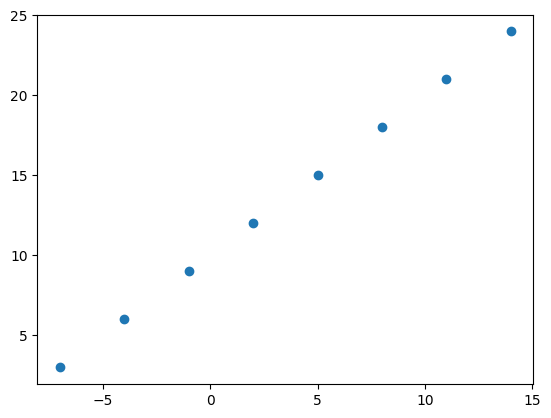

In [2]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-02-09 09:52:33.728497: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-09 09:52:33.728785: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-09 09:52:33.728990: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

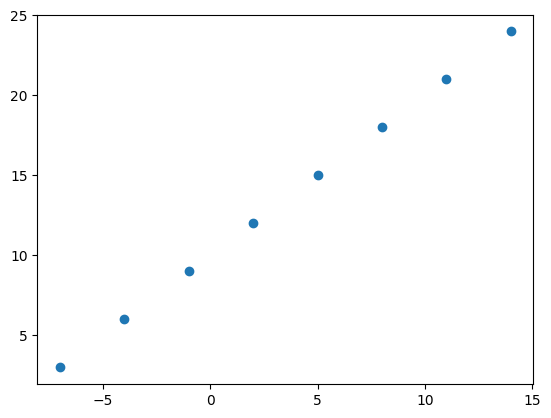

In [10]:
plt.scatter(x, y)

In [11]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)


Epoch 1/50
1/1 [==============================] - 0s 412ms/step - loss: 11.0814 - mae: 11.0814
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 10.9489 - mae: 10.9489
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 10.8164 - mae: 10.8164
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 10.6839 - mae: 10.6839
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 10.5514 - mae: 10.5514
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 10.4189 - mae: 10.4189
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 10.2864 - mae: 10.2864
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 10.1539 - mae: 10.1539
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 10.0214 - mae: 10.0214
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 9.8889 - mae: 9.8889
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss

2024-02-09 09:52:39.814274: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ff92941c650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-09 09:52:39.814302: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-02-09 09:52:39.821265: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1707472359.847167      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 34/50
1/1 [==============================] - 0s 5ms/step - loss: 7.2600 - mae: 7.2600
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2544 - mae: 7.2544
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2488 - mae: 7.2488
Epoch 37/50
1/1 [==============================] - 0s 4ms/step - loss: 7.2431 - mae: 7.2431
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2375 - mae: 7.2375
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2319 - mae: 7.2319
Epoch 40/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2262 - mae: 7.2262
Epoch 41/50
1/1 [==============================] - 0s 4ms/step - loss: 7.2206 - mae: 7.2206
Epoch 42/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2150 - mae: 7.2150
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2094 - mae: 7.2094
Epoch 44/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2038 - 

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 47ms/step


array([[29.450117]], dtype=float32)

In [14]:
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 21ms/step


array([[24.332008]], dtype=float32)

# Improving our Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 200ms/step - loss: 16.1736 - mae: 16.1736
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 15.8923 - mae: 15.8923
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 15.6111 - mae: 15.6111
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 15.3298 - mae: 15.3298
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 15.0486 - mae: 15.0486
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 14.8261 - mae: 14.8261
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 14.6936 - mae: 14.6936
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 14.5611 - mae: 14.5611
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 14.4286 - mae: 14.4286
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 14.2961 - mae: 14.2961
Epoch 11/100
1/1 [==============================] - 0s 4m

In [16]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [17]:
y


<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 46ms/step


array([[29.379057]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    #tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 460ms/step - loss: 13.4780 - mae: 13.4780
Epoch 2/50


2024-02-09 10:35:46.282730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 0s 6ms/step - loss: 12.4508 - mae: 12.4508
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 11.4229 - mae: 11.4229
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 10.3910 - mae: 10.3910
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 9.3503 - mae: 9.3503
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 8.2945 - mae: 8.2945
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 7.2170 - mae: 7.2170
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 6.7182 - mae: 6.7182
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 7.3009 - mae: 7.3009
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 7.9513 - mae: 7.9513
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 8.1916 - mae: 8.1916
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 8.0955 - mae: 8.0955
E

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 38ms/step


array([[26.460878]], dtype=float32)

# Evaluating a model



In [21]:
#Bigger Data

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
#visualize
import matplotlib.pyplot as plt


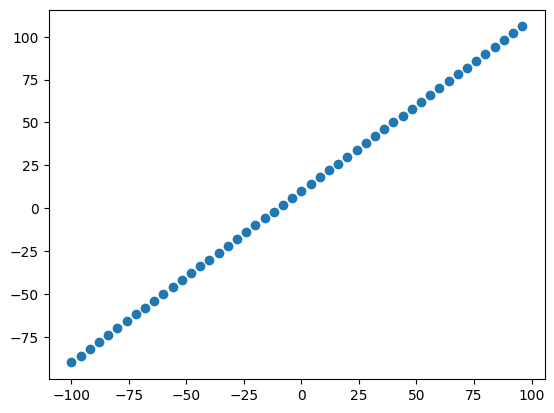

In [24]:
plt.scatter(X, y)

# 3 Sets

In [25]:
len(X)

50

In [26]:
# split the data into train and test data
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

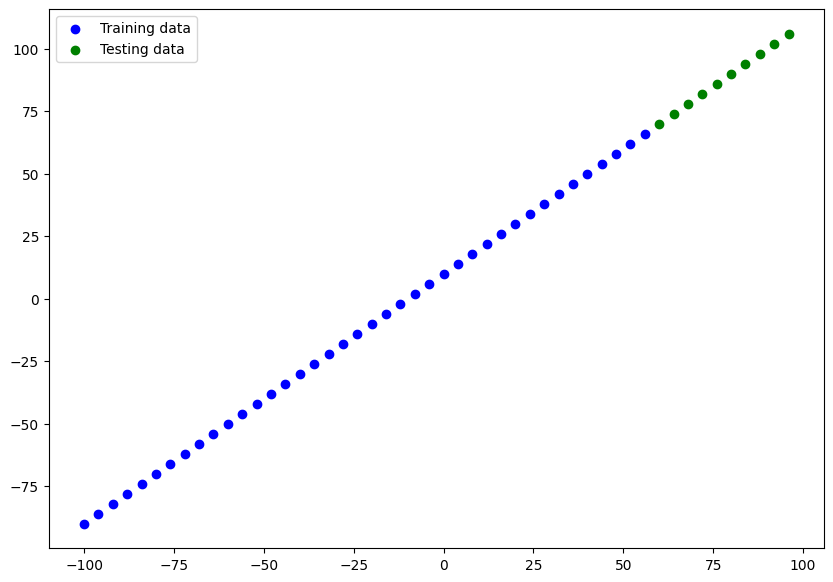

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 49.7564 - mae: 49.7564
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 17.1987 - mae: 17.1987
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 16.3929 - mae: 16.3929
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 8.7538 - mae: 8.7538
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 10.7927 - mae: 10.7927
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 9.9820 - mae: 9.9820
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 9.0332 - mae: 9.0332
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 9.0944 - mae: 9.0944
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 19.8883 - mae: 19.8883
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 10.7549 - mae: 10.7549
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 8.6631

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="TensorFlow_regression")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [31]:
model.summary()

Model: "TensorFlow_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 24.2046 - mae: 24.2046
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 23.1259 - mae: 23.1259
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 28.1778 - mae: 28.1778
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 16.1450 - mae: 16.1450
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 18.6959 - mae: 18.6959
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 14.2678 - mae: 14.2678
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.5304 - mae: 11.5304
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2418 - mae: 11.2418
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 42.1481 - mae: 42.1481
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 29.3275 - mae: 29.3275
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing Model's prediction

In [34]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[ 70.50461 ],
       [ 75.09088 ],
       [ 79.67716 ],
       [ 84.26343 ],
       [ 88.8497  ],
       [ 93.435974],
       [ 98.02225 ],
       [102.60852 ],
       [107.19479 ],
       [111.78107 ]], dtype=float32)

In [35]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    )
plt.scatter(X_test, )

SyntaxError: expected ':' (2865821689.py, line 4)